In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Data warehouse:


In [569]:
df=pd.read_csv('CompanyX_EU.csv')

In [570]:
df

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


# 2. Data exploration:


In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [572]:
df.describe()

,Startup,Product,Funding,Event,Result,OperatingState
count,662,656,448,662,662,662
unique,662,656,240,26,5,4
top,Next Caller,foobot.io,$1M,TC50 2008,Contestant,Operating
freq,1,1,17,52,488,465


In [573]:
df.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [574]:
df.isnull().any()

Startup           False
Product            True
Funding            True
Event             False
Result            False
OperatingState    False
dtype: bool

In [575]:
df.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

# 3. Data preprocessing & visualisation:

In [576]:
df2 = df.dropna() 
df2

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [577]:
df2['Funding'].apply(type)

1      <class 'str'>
3      <class 'str'>
5      <class 'str'>
6      <class 'str'>
10     <class 'str'>
           ...      
657    <class 'str'>
658    <class 'str'>
659    <class 'str'>
660    <class 'str'>
661    <class 'str'>
Name: Funding, Length: 446, dtype: object

In [578]:
df3=df2.copy(deep=True)

In [579]:
#Changing funding in numericaly computable dta type
df3.loc[:,'Funding_in_million']=df3['Funding'].apply(lambda x: str(x[1:]))
df3['Funding_in_million']=df3['Funding_in_million'].replace({'K': '/1000', 'M': '','B':'*1e3'}, regex=True).map(pd.eval)
df3

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.00
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.40


In [580]:
df3['Funding_in_million'].apply(type)

1      <class 'float'>
3      <class 'float'>
5      <class 'float'>
6      <class 'float'>
10     <class 'float'>
            ...       
657    <class 'float'>
658    <class 'float'>
659    <class 'float'>
660    <class 'float'>
661    <class 'float'>
Name: Funding_in_million, Length: 446, dtype: object

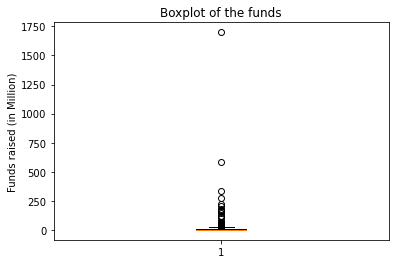

In [581]:
%matplotlib inline
from matplotlib import pyplot as plt

plot = plt.boxplot( df3['Funding_in_million'])
plt.title('Boxplot of the funds')
plt.ylabel("Funds raised (in Million)")

plt.show()

In [582]:
# Dropping Column funding, because we have the converted version.
df3=df3.drop(['Funding'],axis=1) 

In [583]:
# lower fence from boxplot
lower_fence = plot['caps'][0].get_data()[1][1]   
lower_fence

0.005

In [584]:
# upper fence from boxplot
upper_fence = plot['caps'][1].get_data()[1][1]  
upper_fence

22.0

In [585]:
df3['Funding_in_million'].describe()

count     446.000000
mean       17.241489
std        90.483710
min         0.005000
25%         0.745250
50%         2.200000
75%         9.475000
max      1700.000000
Name: Funding_in_million, dtype: float64

In [586]:
### interquantile range 
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Funding_in_million    8.72975
dtype: float64


In [587]:
Q1 - 1.5 * IQR

Funding_in_million   -12.349375
dtype: float64

In [588]:
Q3 + 1.5 * IQR

Funding_in_million    22.569625
dtype: float64

In [590]:
index_o=df3[(df3['Funding_in_million'] > upper_fence)].index
index_o

Int64Index([  6,  31,  40,  49,  56, 108, 113, 128, 130, 132, 138, 139, 154,
            166, 172, 179, 180, 188, 191, 209, 213, 215, 225, 231, 271, 276,
            279, 282, 302, 305, 313, 325, 346, 389, 393, 394, 398, 427, 432,
            435, 460, 471, 546, 555, 560, 581, 593, 598, 606, 615, 625, 643,
            644, 647, 649, 650, 654, 656, 659, 661],
           dtype='int64')

In [591]:
#number of outliers greater than upper fence
len(index_o)

60

In [592]:
df3=df3.drop(index=index_o)

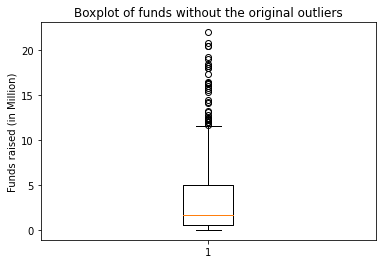

In [593]:

plot = plt.boxplot(df3.Funding_in_million)
plt.title('Boxplot of funds without the original outliers')
plt.ylabel("Funds raised (in Million)")
plt.show()

<AxesSubplot:xlabel='OperatingState', ylabel='count'>

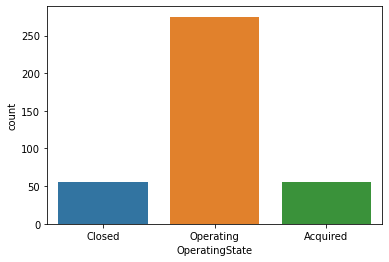

In [594]:
sns.countplot(x="OperatingState", data=df3)

In [595]:
df3['OperatingState'].value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

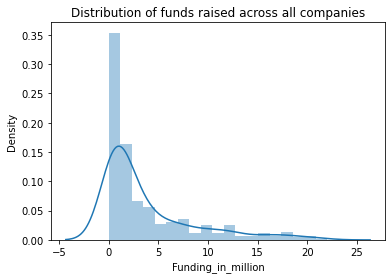

In [596]:
sns.distplot(df3['Funding_in_million'])
plt.title('Distribution of funds raised across all companies')
plt.show()

In [597]:
df3['Funding_in_million'].describe()

count    386.00000
mean       3.72514
std        4.73236
min        0.00500
25%        0.60000
50%        1.70000
75%        5.00000
max       22.00000
Name: Funding_in_million, dtype: float64

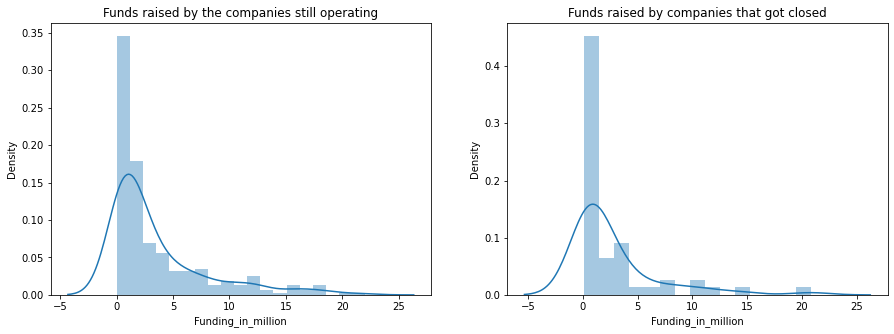

In [598]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(df3.loc[df3.OperatingState == 'Operating', 'Funding_in_million'], ax = ax[0])
sns.distplot(df3.loc[df3.OperatingState =='Closed', 'Funding_in_million'], ax = ax[1])

ax[0].set_title('Funds raised by the companies still operating')
ax[1].set_title('Funds raised by companies that got closed')
plt.show()

# 4. Statistical analysis:

Null Hypothesis(H0)- Funds raised by companies that are still operating is same as  that of companies closed down

Alternate Hypothesis(H1) :  Funds raised by companies that are still operating is significantly different from companies that closed down

#For this we will perform Two tailed t-test

In [607]:
from scipy.stats import ttest_ind

alpha = 0.05    # Let's consider a significance level of 5%
Operating_values=df3.groupby('OperatingState')['Funding_in_million'].apply(list)[2]
Closed_values=df3.groupby('OperatingState')['Funding_in_million'].apply(list)[1]

test_statistic, p_value = ttest_ind(Operating_values, Closed_values)
print(test_statistic, p_value)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')


1.3039132895334589 0.1931747168826862
	 Since the p-value, 0.193 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


In [608]:
#Manually calculating
import scipy.stats as stats


N1=len(Operating_values)
N2=len(Closed_values)

t_critical=stats.t.ppf(0.95,(N1+N2-2)) #for two tailed

d1 = N1-1
d2 = N2-1
df = d1+d2
x1=Operating_values
x2=Closed_values
s1 = np.std(x1,ddof=1)
s2 = np.std(x2,ddof=1)
x1_bar = np.mean(x1)
x2_bar = np.mean(x2)

sp = np.sqrt((d1*s1**2 + d2*s2**2)/df)
se = sp*np.sqrt(1/N1 + 1/N2)
t = (x1_bar - x2_bar)/(se)
print("t-statistic", t)
print("t_critical",t_critical)

t-statistic 1.3039132895334589
t_critical 1.6494982925069397


In [609]:
#t-statistic < t-critical . Hence we fail to reject the Null hypothesis

In [610]:
df4=df3.copy(deep=True)

In [611]:

df4.Result.value_counts()

Contestant         282
Finalist            52
Audience choice     20
Winner              17
Runner up           15
Name: Result, dtype: int64

#Frequency distribution of Result variable

(array([282.,   0.,  20.,   0.,   0.,  17.,   0.,  52.,   0.,  15.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

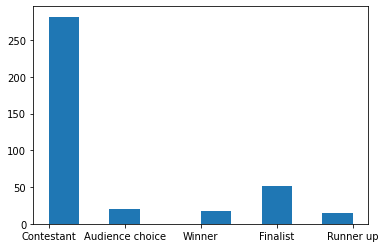

In [612]:
plt.hist(df4['Result'])


<AxesSubplot:>

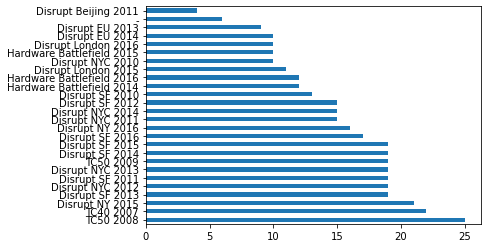

In [620]:
df4['Event'].value_counts().plot(kind='barh')

In [621]:
winners = df4.Result.value_counts()[1:].sum()
contestants = df4.Result.value_counts()['Contestant']
contestants_operating = df4.OperatingState[df4.Result == 'Contestant'].value_counts().loc['Operating']
winners_operating = df4.OperatingState[df4.Result != 'Contestant'].value_counts().loc['Operating']


In [622]:
winners_operating/winners, contestants_operating/contestants

(0.7788461538461539, 0.6879432624113475)


Null hyputhesis (Ho): The proportion of companies that are operating is the same in  winners and contestants

Alternative hypothesis (Ha): The proportion of companies that are operating is significantly different from each other, among the two categories



In [623]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.08 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


In [624]:
df3[df3.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts()

Disrupt NY 2015         21
Disrupt SF 2015         19
Disrupt SF 2014         19
Disrupt SF 2013         19
Disrupt NYC 2013        19
Disrupt NYC 2012        19
Disrupt SF 2011         19
Disrupt SF 2016         17
Disrupt NY 2016         16
Disrupt SF 2012         15
Disrupt NYC 2014        15
Disrupt NYC 2011        15
Disrupt SF 2010         13
Disrupt London 2015     11
Disrupt NYC 2010        10
Disrupt EU 2014         10
Disrupt London 2016     10
Disrupt EU 2013          9
Disrupt Beijing 2011     4
Name: Event, dtype: int64

In [625]:
events = df3[df3.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)].Event  #  relevanct events 
events

1         Disrupt NYC 2013
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
              ...         
635        Disrupt NY 2015
641       Disrupt NYC 2013
642        Disrupt SF 2014
646    Disrupt London 2015
660        Disrupt SF 2013
Name: Event, Length: 185, dtype: object

In [626]:
NY_events = df4.loc[events[events.apply(lambda x: 'NY' in x)].index, 'Funding_in_million']
SF_events = df4.loc[events[events.apply(lambda x: 'SF' in x)].index, 'Funding_in_million']
EU_events = df4.loc[events[events.apply(lambda x: 'EU' in x or 'London' in x)].index, 'Funding_in_million']
print(len(NY_events), len(SF_events), len(EU_events))

71 74 40


In [627]:
NY_events

1       0.6300
3       1.0000
18     12.2000
51      0.5200
55      0.0200
        ...   
626    10.0000
629     0.0857
633     2.5000
635     0.0500
641    15.8000
Name: Funding_in_million, Length: 71, dtype: float64


Null Hypothesis(Ho): Average funds raised by companies across NY, SF and EU events from
2013 onwards are  same

Alternative Hypothesis(Ha): Average funds raised by companies across three cities are  different.

    We will perform ANOVA for these samples

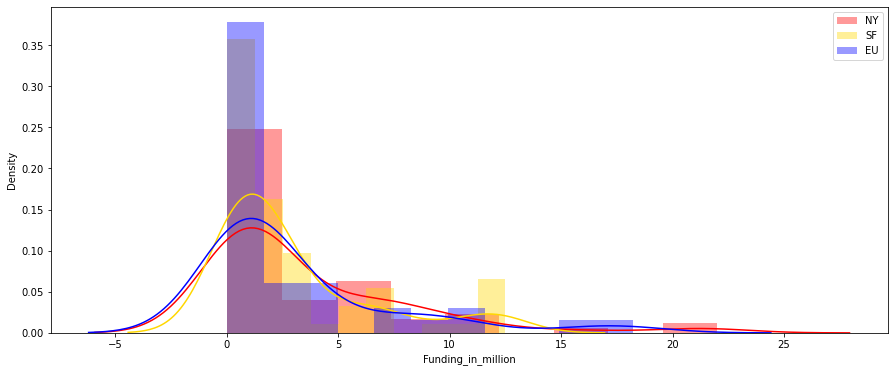

In [628]:
plt.figure(figsize=(15,6))
sns.distplot(NY_events, color = 'Red', label = 'NY')
sns.distplot(SF_events, color = 'Gold', label = 'SF')
sns.distplot(EU_events, color = 'blue', label = 'EU')
plt.legend()
plt.show()

In [ ]:
 distributions look quiet similar

we have to analyse this using hypothesis testing.

In [629]:
from scipy.stats import f_oneway


stat, p_value = f_oneway(NY_events, SF_events, EU_events)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.628 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


Average funds raised by companies across NY, SF and EU events from
2013 onwards are same. There is no significant difference.

# 5.
=> Volume- The data has small volume, which can be easily analysed. 

=> Variety-data is all structured data with difffernt data types in it.

=> Veracity - There is no inherent biases, noise and abnormality in data. data have some null values.
comprehensive data quality assessment and reporting is possible.
**Data contains many outliers and null values. A few outliers are very large which are diffivult to analysed with rest of the data.

=> velocity- Data can be processed quickly.                                                                                                                                                                                     
=> Value- Data is very valuable, contains precise and usefull information about the companies.  
Some more information could be added for better analysis like profit earned , loss etc.